# User Community Detection & Recognition
**Aditi Vinod & Luke Witten**

## Introduction

### Primary Questions
What terms are unique to internet sub-communities, like gamers? \
Based on social media content or messages sent, can an individual be associated with a specific internet sub-community?

### Background Information
Due to the ease of access to the internet, people have been able to find and interact with niche groups that share similar interests to themselves online. Similar to how dialects and accents have formed based on regions in the past, various new words and phrases, exclusive to individual communities, have popped up in sectors of the internet. 

One example of a popular community with a large online presence is gamers. Especially following the recent 2020 COVID-19 pandemic, there has been a significant increase in the past few years in the number of individuals who spend time playing games - both individually and in teams - online. Through content creators (on Twitch, YouTube, TikTok, etc.), online forums, and memes, the English-speaking gaming community likely has one of the most developed subsets of the language to exist; there are a significant number of terms, like "pog," "gg," and "smurf" that have either no significance or mean something different to non-gaming members of society. 

Being able to identify these differences in language could help with identifying trends between generations and cultures, determining examples of code switching, and identifying more important user communities than "gamers".

In order to create a list of "gamer words," or terms that are unique to gamers online, and determine whether an individual is a gamer, several steps must be taken: \
1-Collect data that reflects usage of language online in "gamer" communities and "normally" \
2-Compare the two data sets in order to create a list of "gamer words" that did not include unavoidable common words in the English language \
3-Collect data for individual users representing their usage of language \
4-Use the "gamer words" list and the individuals' usage of said gamer words to determine whether they are a gamer or not



1-What is the question you are trying to answer or the story that you are trying you tell?
2-Why is this question or story important?
3-What were the main steps your project made towards answering the question or telling the story?

### Prerequisite Code
The following cell ensures that the necessary functions are imported into the document and that the notebook uses the latest version of all code in the library:

In [83]:
%load_ext autoreload
%autoreload 2

from PIL import Image
from IPython.display import display

from scrape_data import *
from gamer_words import *
from visualize_data import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Methodology
 
### Data Collection
#### Reddit Data
The data that was collected in order to determine "gamer" and "normal" usage of language on the internet was pulled from Reddit. Reddit was chosen because it is a platform that is used by a significant number of people on the internet across hundreds of sub-communities, represented by subreddits. 
 
Data from Reddit was gathered via the ``PRAW`` API which was used to go through the text present on the top 10000 posts on various given subreddits. Via the ``scrape_subreddits`` function, the text from these submissions was stored in a dictionary where the keys represented each word and the values represented the number of times that said word appeared. Prior to being added into these dictionaries, the text from Reddit was made lowercase and punctuation was removed. The dictionary was then converted into a CSV file, using ``csv_to_dict`` for storage. 
 
Initially, the comments from each post were also being stored; however, ``PRAW`` has limitations regarding how many comments it is capable of parsing at a given time and was unable to handle the sheer amount of comment discourse present on the subreddits chosen for data analysis. As a result, the comment scraping was removed and the number of submissions parsed was increased from the original 2000 to 10000. The number of submissions parsed was determined by increasing it until there no longer significantly affected the program's resulting "gamer words". 
 
While the ``scrape_subreddits``can take in a list of any amount of subreddit names, it was determined that collecting data from five subreddits was ideal. To maintain a similar number of normal subreddits and gamer subreddits, the latter were used as the limiting factor; there is a large dropoff in activity and subscriber count in game specific subreddits after [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/pokemon](reddit.com/r/pokemon), and [/r/minecraft](reddit.com/r/minecraft). The combination of these three major game subreddits and the two overall "gaming" subreddits - [/r/gaming](reddit.com/r/gaming) and [/r/games](reddit.com/r/games) - creates a total of five.
 
The subreddits that were chosen for "gaming" and "normal" subreddits were selected based on those with the greatest popularity; this was determined by a combination of number of subscribers and by ensuring that there was still frequent posting present on the subreddits in question. For example, initially, [/r/announcements](reddit.com/r/announcements) was one of the selected "normal" subreddits; however, despite it being the most subscribed to subreddit, there are almost no posts there, so it was replaced. Additionally, subreddits that were primarily centered around images and video, like [/r/aww](reddit.com/r/aww), were excluded. The final gaming subreddits chosen were [/r/gaming](reddit.com/r/gaming), [/r/games](reddit.com/r/games), [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/minecraft](reddit.com/r/minecraft), and [/r/pokemon](reddit.com/r/pokemon); the final "normal" subreddits chosen were [/r/iama](reddit.com/r/iama), [/r/askreddit](reddit.com/r/askreddit), [/r/science](reddit.com/r/science), [/r/worldnews](reddit.com/r/worldnews), and [/r/todayilearned](reddit.com/r/todayilearned).
The frequency CSVs from the "gamer" and "normal" subreddits were used to determine a list of gamer-specific words.
 
#### Discord Data
The data that was collected from users was pulled from Discord. Discord is a messaging platform where individuals can join servers, or spaces on discord for individual communities and friend groups, and communicate through various channels, or messaging spaces that are typically split up by different topics or rules within a server. Discord was chosen as messaging is where the most natural usage of individual language occurs; furthermore, there was easy access with multiple servers containing between 150-14000 messages per individual. 
 
Data from eighteen users was collected from one server that had no primary purpose other than being a means of communication between friends. Data from six additional users was collected from a different server that was dedicated to gaming, specifically Minecraft. All users in question were briefed on what data would be collected and how it would be used prior to giving consent. 
 
The ``collect`` command takes in either a user, or assumes the user calling the command in the server if none is specified, and parses through all of their messages in every channel in order to create a frequency dictionary of the words that they have sent. Like the Reddit data collected, all of the words are made lowercase and most punctuation is removed. The frequency dictionary is then turned into a CSV and automatically saved with Discord username as the file name. For the sake of privacy, the generated names have been modified in this implementation.
The frequency CSVs from the users were used to determine which users would be considered "gamers" based on their gamer word versus normal word usage.

### Data Processing

Storing data in the form of CSVs ensures that it does not need to be re-scraped from Reddit; however the data is also not readily accessible by the computer at any given time.

Fortunately, reading from a CSV is not difficult - the function ``csv_to_dict`` was used to convert the CSV file back into a dictionary representing the word frequencies:

In [84]:
gamer_dictionary = csv_to_dict("gaming.csv")
print(f"The length of the dictionary is {len(gamer_dictionary)}")

The length of the dictionary is 17741


#### Removal of Uncommon Values
Even though this dictionary contains how many times a word is used in the dataset that was collected, many of the words that appear only once or are typos; these sections of the data are not particularly useful as they are unlikely to be words commonly used by gamers.

Further "words" that are useless are those that are far too long, like urls and other oddly specific typos.

The removal process was completed by the ``remove_too_uncommon`` function:

In [85]:
# Create a new dictionary with only words that appear 3 or more times
gamer_dictionary_1 = remove_too_uncommon(gamer_dictionary, 3)
print(f"The length of the dictionary is {len(gamer_dictionary_1)}.")

The length of the dictionary is 5056.


#### Determine Gamer Words v1
The number three was selected as the threshold value for "uncommon" terms as it seems to be the point at which most typos and accidental concatenations were filtered out. From testing, any number between 3 and 15 as the threshold seems to have similar efficacy.

The dataset produced at this point is significantly smaller than the original and likely more representative of words that gamers actually say. 

The words that gamers use the most were determined by which ones appeared the most frequently in the dataset; these gamer words were then compared to various users' post histories to find out if they are gamers.

Running `find_most_frequent` determined the five most frequently occurring "gamer words":

In [86]:
gamer_dictionary_2 = find_most_frequent(gamer_dictionary_1, 5)
print(f"The five most frequent gamer words are {gamer_dictionary_2}.")

The five most frequent gamer words are {'the': 6782, 'to': 4346, 'and': 3521, 'a': 3467, 'of': 3003}.


Displaying the top five most frequent numbers was arbitrarily chosen based on what was visually appealing; this function works for other numbers, though.

The ``find_most_frequent`` function's results are clearly not gamer words; while there gamers use words like "a", "and", and "the" frequently, these words are not unique to "gamer vocabulary". 

#### Using Normal Words to Remove Non-Unique Words

To fully determine what words are unique to "gamer vocabulary," the language dataset from gamers was compared with that of "non-gamers" - this data that was stored in `normal.csv`.

To filter out words from both dictionaries, comparisons were made regarding how frequently a word occured in both dictionaries. If a given word was used too similarly in both language sets, then they were removed from both.

Unfortunately, the dictionary stores the number of times a word has been used in a language set and not the percentage of times that a word is used in the entire language set. The ``instances_to_decimal`` function was able to resolve this issue. It also outputs the number of total words in the entire dictionary in order to maintain a record of that somewhere.

In [87]:
# Create and store the normal dictionary
normal_dictionary = csv_to_dict("normal.csv")

# Remove infrequent words
normal_dictionary_1 = remove_too_uncommon(normal_dictionary.copy(),3)
#switch the normal and gamer dictionaries from tracking the number of times 
#a word has been used to the frequency that a user uses that words
#for later functions it is also desirable if this function outputs the total
#usages of words in the original dictionary
gamer_decimal_dictionary, gamer_dict_total_words = instances_to_decimal(gamer_dictionary_1.copy())
normal_decimal_dictionary, normal_dict_total_words = instances_to_decimal(normal_dictionary_1.copy())

the_usages = gamer_dictionary_1["the"]
the_decimal = gamer_decimal_dictionary["the"]
print(f"\"the\" is used {the_usages} times in the gamer dictionary.")
print(f"\"the\" is used {the_decimal} of the time in the gamer language set.")

"the" is used 6782 times in the gamer dictionary.
"the" is used 0.0482409343746888 of the time in the gamer language set.


#### Remove Common English Words

After the data was converted to a usable form, both language sets were parsed in order to remove words that appeared a similar percentage of the time in them, ensuring that words that are fundamental to human speech - like conjunctions, pronouns, and articles - which are likely used by both gamers and non-gamers are not counted as "gamer words." Conversely, removing all the "normal-seeming" words was not the solution because gamers sometimes have higher usage of "common" words; for example, gamers tend to use "they" 70$ more than average, which is still important information even though "they" is not a word with any gamer-related connotations. 

While the actual percentage value that used for this process is arbitrary, it was found that removing words with frequency values within 25% of each other worked well as it removes a substantial amount of minimally useful data while still leaving behind a robust dataset to analyze.

The function `remove_most_common` was called to parse the gamer and normal dictionaries with respect to each other. It even output a list of words that were removed from both sets, which is helpful for parsing individual user data.

In [88]:
normal_decimal_dictionary_1, gamer_decimal_dictionary_1, ignore_list = remove_most_common(normal_decimal_dictionary,gamer_decimal_dictionary,normal_dict_total_words,gamer_dict_total_words)
print(f"The length of the dictionary is {len(gamer_decimal_dictionary_1)}.")

The length of the dictionary is 4325.


After curating two language sets - one for the gamer language and one for the normal language - there still is no way to determine what words are unique to the gamer lexicon. 

#### Determine Gamer Words v2

To do this, all of the words that appear in both the gamer and normal dataset were analyzed. If the word was used eight times more often or more in the gamer language set than in the normal one, it was considered a gamer word. This 8x threshold, though somewhat arbitrary, was determined by testing various values until a suitable number of gamer words that were not overly specific nor too common was reached.

Sometimes, gamer words do not appear in the normal language set at all. Through testing, it was determined that if a word does not appear in both data sets an dits frequency of occurence values was over 0.000079, it was considered a gamer word. While this value is also seemingly random, it, too, was determined through testing on data.

Using the adjusted data sets and the ``determine_gamer_words`` function, the gamer words and the number of gamer words were determined.

In [89]:
gamer_words_1 = determine_gamer_words(normal_decimal_dictionary_1,gamer_decimal_dictionary)
print(f"There are {len(gamer_words_1)} gamer words.")

There are 614 gamer words.


The above data processing functions make up a majority of the process, and in order to streamline the process, the ``parse_words`` function was created to handle all of those steps together. 

#### Determining Language Similarity

To complete the second goal of determining whether a given user is a gamer or not, the ``determine_language_similarity`` function was created to compare a user's language usage to the gamer and normal datasets.

This function is able to determine how similar two language sets are by imagining each set as a vector; the lower the output of this function, the closer the two language sets are to each other. While said output does not mean much as a stand alone number, when compared against the values of other users, the information is useful.

In [90]:
#load user data and convert it into a usable form
user_language_dictionary = csv_to_dict("anonymous_data/user6.csv")
user_language_dictionary, user_total_uses = instances_to_decimal(user_language_dictionary)
#determine a closeness value for a user and the gamer language
language_closeness_value = determine_language_similarity(gamer_decimal_dictionary_1,user_language_dictionary)

print(f"the user dataset and gamer dataset are {language_closeness_value} close")

the user dataset and gamer dataset are 0.08083591714611661 close


#### Creating Statistics From Similarity Values

The ``analyze_users_language``function builds upon this capability and determines how close an individual user's language set is to the gamer langage set and the normal language set each. It also calculates a third stat, being the ratio of how many times a given user uses "gamer words" to the total words they use. 

``analyze_users_language`` was called on all twenty five of the collected users' datasets. Furthermore, the function call also includes a call to ``remove_most_common`` to ensure that they do not mess with any of the values being calculated.

In the following code, user 2's data is taken from the results to show the numbers produced:

In [91]:
folder_path = "anonymous_data"
user_value_dictionary = analyze_users_language(normal_decimal_dictionary_1,gamer_decimal_dictionary_1,\
    gamer_words_1, ignore_list, folder_path)
user_2_analysis = user_value_dictionary["anonymous_data/user2.csv"]
print(f"User 2's closeness values and gamer word ratio are {user_2_analysis}")

User 2's closeness values and gamer word ratio are [0.03275724882067993, 0.03387020029531926, 0.003691261250051613]


The example below utilizes the condensed version of producing the gamer words and statistics via ``parse_words``:

In [92]:
uncommon_threshold = 10
gamer_analysis = parse_words(normal_dictionary_1, gamer_dictionary_1, uncommon_threshold)
user_stats_dict = analyze_users_language(gamer_analysis[0], gamer_analysis[1], gamer_analysis[2], gamer_analysis[3], folder_path)

#### Standardizing Meaningful Statistics via Z-Scores

Once again, the first two elements of the lists present in ``user_stats_dict``, while representative of a "closeness," have little to no meaning as standalone numbers. As a result, these numbers for the sake of comparisons and data visualizations, were converted into z-scores.

A z-score is a number representing how many standard deviations an individual data point, or closeness value, lies above or below the mean. In this case, the mean and the standard deviation are calculated from all of the testing users' closeness to the normal and gamer word lists.

The ``stats_and_z_info`` function completes this; user 2's data is once again displayed as an example:

In [93]:
stats, z_dict, z_list = stats_and_z_info(user_stats_dict, folder_path)
user_2_z_scores = z_dict["anonymous_data/user2.csv"]
print(f"User 2's z-score for closeness to the gamer words is {user_2_z_scores[0]} and for closeness to the normal words is {user_2_z_scores[1]}")

User 2's z-score for closeness to the gamer words is -0.9078393654307514 and for closeness to the normal words is -0.8196757394470776


## Results

### Gamer Words

The list of gamer words can be represented as a word cloud based on how frequently they were used on the gaming subreddits that were parsed:

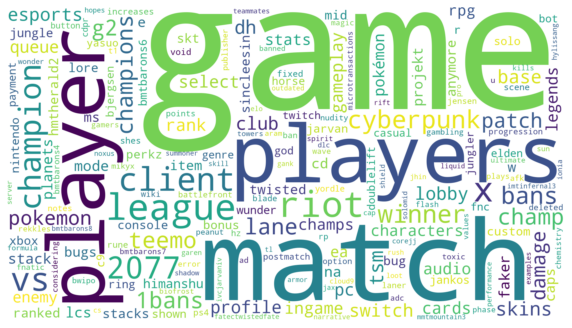

In [94]:
gamer_words_freq = determine_gamer_words_frequency(gamer_analysis[0], gamer_analysis[1])
word_cloud(gamer_words_freq)

Game is the most prominent word present on gaming subreddits, as demonstrated by its size, which is heavily in line with the expectations for the determined "gamer words."

Most of the words that are present in the word cloud are also those that are associated with the game League of Legends, various esports teams, or other games in general, indicating that the "gamers" sub-community of the internet has developed its own language and it can be determined through parsing gaming subreddits.

### All User Data
Stats were collected from the frequency dictionaries of the twenty five users that data was collected from. These stats include user words z-score for language similarity to the "normal words," z-score for closeness to the "gamer words," and the ratio of gamer words to all words in a users' messages.

The first histogram displays the first two stats overlaid on each other while the second histogram displays the third:

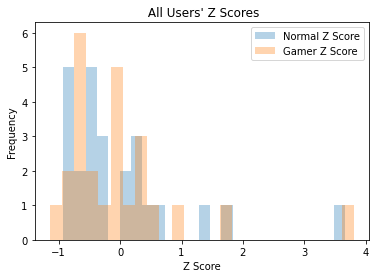

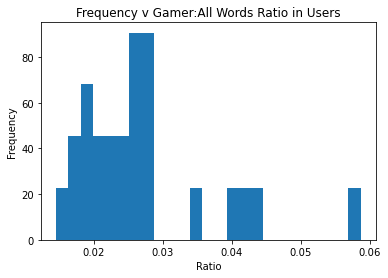

In [95]:
bins = len(z_list[0])
stacked_histogram(z_list, bins, "Normal Z Score", "Gamer Z Score", "Z Score", " All Users' Z Scores")
single_histogram(stats[2], bins, "Ratio", "Frequency v Gamer:All Words Ratio in Users")

The first histogram indicates that the distribution of "normal" words for the twenty five users was approximately the same as that of the "gamer" words in the same sample.

The second histogram indicates that the frequency of gamer words present in the vocabulary of the twenty five users is actually relatively low in their overall words; this is not because all of the individuals in the data set are not "gamers," but rather more likely due to the fact that members of the gamer sub-community still frequently utilize other normal words in their everyday speech.

### ID Cards

In order to represent whether individuals from the test data are gamers or not, "ID Card" images were made for each user. These contain the final declaration on whether the user is a gamer as well as a few additional pieces of info including the z score, or language similarity, for gamer words and normal words, the gamer to all words ratio, and the user's top five most frequently used gamer words. 

The ID cards typically contain the user's name as well; however, these have currently been replaced for the sake of privacy. The "profile pictures" on the ID cards are randomly generated as well.

While ID cards were made for all twenty five of the users in the data set, only two are displayed below:

In [96]:
file_list = get_file_list(folder_path)
save_path = "id_cards"
user_id_dict = generate_user_id_dict(z_dict, user_stats_dict, gamer_analysis[2], folder_path)
for user in file_list:
    create_profile_image(user_id_dict[user][0], user_id_dict[user][1], user_id_dict[user][2], user_id_dict[user][3], user_id_dict[user][4], user_id_dict[user][5], save_path)

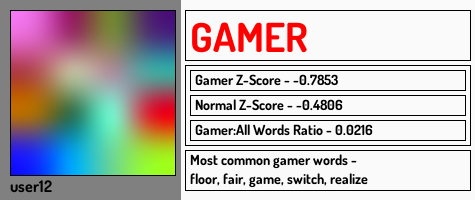

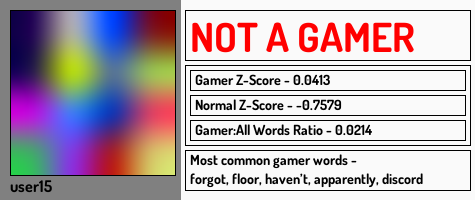

In [97]:
display(Image.open(f"{save_path}/user12.png"))
display(Image.open(f"{save_path}/user15.png"))

## Interpretation

The above data analysis provides a method in which different language sets can be quantified and compared, words specific to a language or community can be found, and members of a given community can be identified via language frequency patterns, proving that it is possible to group individuals by what they do, say, and type.

While the purpose of the analysis above - determining specific "gamer" vocabulary and finding out whether someone is a "gamer" or not - is a lighthearted question, the theory and functions present in the analysis as well as the detection of users part of larger communities has potential for more serious and ethically dubious uses. While it seems far off, similar programs could allow authoritarian regimes to classify people as protestors or companies to automatically find toxic users in an online forum. The fact that this code can act as a classifier for individuals given nothing but the words they have typed could make this an incredibly powerful tool for anyone trying to moderate or systematically discriminate against people.

As programmers, we feel that more than anything we learned how to scope our own software projects, scrape data using an API, systematically curate large amounts of data, and create images automatically using software. Both of us feel like we are substantially more proficient at teaming in software projects and would know better how to collaborate on a project of this scale and scope in the future, particularly with using git and maintaining documentation so that our partners can easily collaborate on the code that the other wrote.

The main pain points of this project came in the form of dealing with API limitations, writing mass amounts of documentation for the main and helper functions created, creating unit tests without a template, and having to retroactively change several functions to implement new features. If we were to start over on this project, we are confident that we would be better about actively writing documentation, test functions, and would consider restructuring our dataset to use data frames instead of multiple dictionaries.

If we were to extend this project, we would likely go about acquiring much more, and more statistically soundly collected data from users. The way we are determining gamers now involves utilizing z-scores from users representing how closely their language usage aligns with the gamer and normal language sets. It would be interesting to gather data from a wide range of people who we knew were either gamers or not gamers and refactor our method for determining whether someone is a gamer through more statistically significant means. Furthermore, we would most likely switch from using ``PRAW`` API to ``Pushshift`` API as the latter seems to be capable of handling significantly higher quantities of data; this would allow us to expand into including the entire comment section when pulling from Reddit. We have also discussed the possibility of using machine learning to optimize some of the more arbitrary values we have chosen to optimize the data curation and gamer word detection portions of our code. We would also like to run the code for different interest groups and possibly use it to determine something like political affiliation or age.